In [1]:
import pandas as pd

df = pd.read_csv("../data/fake.csv")  
df.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [2]:
# Count missing values in each column
df.isnull().sum()
# Shape of dataset (rows, columns)
df.shape
# Column info and datatypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null  int64  
 16  like

In [7]:
# Count how many fake vs real
print(df['label'].value_counts())

# Visualize distribution
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar', title='Label Distribution')
plt.show()


KeyError: 'label'

In [3]:
print("Original dataset shape:", df.shape)
print("Original type distribution:")
print(df['type'].value_counts())
print("\n" + "="*50 + "\n")

# Step 1: Keep only 'title', 'text', and 'type' columns
df_clean = df[['title', 'text', 'type']].copy()
print("After selecting columns:", df_clean.shape)

# Step 2: Drop rows with missing values
print("Missing values before cleaning:")
print(df_clean.isnull().sum())
df_clean = df_clean.dropna()
print("After dropping missing values:", df_clean.shape)

# Step 3: Combine 'title' and 'text' into a single column called 'content'
df_clean['content'] = df_clean['title'].astype(str) + ' ' + df_clean['text'].astype(str)
print("After combining title and text:", df_clean.shape)

# Step 4: Convert labels in 'type' to numeric (fake=0, real=1)
# Based on the data exploration, we need to map the categories to binary classification
# Let's consider 'fake', 'bias', 'conspiracy', 'hate', 'junksci' as fake (0)
# and 'bs', 'satire', 'state' as real (1) - though this may need adjustment based on your specific needs

fake_categories = ['fake', 'bias', 'conspiracy', 'hate', 'junksci']
real_categories = ['bs', 'satire', 'state']

def map_to_binary(type_val):
    if type_val in fake_categories:
        return 0  # fake
    elif type_val in real_categories:
        return 1  # real
    else:
        return -1  # unknown category

df_clean['label'] = df_clean['type'].apply(map_to_binary)

# Remove any rows with unknown categories (-1)
df_clean = df_clean[df_clean['label'] != -1]

# Keep only the content and label columns for the final dataset
df_final = df_clean[['content', 'label']].copy()

print("\nFinal binary label distribution:")
print(df_final['label'].value_counts())
print(f"Fake (0): {(df_final['label'] == 0).sum()}")
print(f"Real (1): {(df_final['label'] == 1).sum()}")

# Step 5: Print dataset shape and first 5 rows
print(f"\nFinal dataset shape: {df_final.shape}")
print("\nFirst 5 rows:")
print(df_final.head())

Original dataset shape: (12999, 20)
Original type distribution:
type
bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: count, dtype: int64


After selecting columns: (12999, 3)
Missing values before cleaning:
title    680
text      46
type       0
dtype: int64
After dropping missing values: (12273, 3)
After combining title and text: (12273, 4)

Final binary label distribution:
label
1    11140
0     1133
Name: count, dtype: int64
Fake (0): 1133
Real (1): 11140

Final dataset shape: (12273, 2)

First 5 rows:
                                             content  label
0  Muslims BUSTED: They Stole Millions In Gov’t B...      0
1  Re: Why Did Attorney General Loretta Lynch Ple...      0
2  BREAKING: Weiner Cooperating With FBI On Hilla...      0
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...      0
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...      0


In [4]:
# TODO: Preprocess text data for fake news detection
# Steps:
# 1. Lowercase all text in 'content'
# 2. Remove punctuation, numbers, and extra spaces
# 3. Remove stopwords (like "the", "is", "and")
# 4. Apply lemmatization (convert words to root form, e.g., "running" -> "run")
# 5. Store the cleaned text in a new column 'clean_content'
# 6. Print 5 cleaned examples

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
print("Downloading NLTK data...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Comprehensive text preprocessing function
    """
    if pd.isna(text):
        return ""
    
    # Step 1: Lowercase all text
    text = text.lower()
    
    # Step 2: Remove punctuation, numbers, and extra spaces
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Step 3 & 4: Tokenize, remove stopwords, and lemmatize
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens 
              if word not in stop_words and len(word) > 2]
    
    return ' '.join(tokens)

print("Preprocessing text data...")
print("Original data shape:", df_final.shape)

# Apply preprocessing to the content column
df_final['clean_content'] = df_final['content'].apply(preprocess_text)

print("After preprocessing:")
print("Data shape:", df_final.shape)
print("Columns:", df_final.columns.tolist())

# Step 6: Print 5 cleaned examples
print("\n" + "="*80)
print("BEFORE vs AFTER PREPROCESSING - 5 Examples:")
print("="*80)

for i in range(5):
    print(f"\n--- Example {i+1} ---")
    print(f"Label: {df_final.iloc[i]['label']} ({'Fake' if df_final.iloc[i]['label'] == 0 else 'Real'})")
    print(f"ORIGINAL: {df_final.iloc[i]['content'][:200]}...")
    print(f"CLEANED:  {df_final.iloc[i]['clean_content'][:200]}...")

# Check for any empty cleaned content
empty_content = df_final['clean_content'].str.len() == 0
print(f"\nRows with empty cleaned content: {empty_content.sum()}")

if empty_content.sum() > 0:
    print("Removing rows with empty cleaned content...")
    df_final = df_final[~empty_content].reset_index(drop=True)
    print(f"Final data shape: {df_final.shape}")

print(f"\nFinal dataset summary:")
print(f"Total samples: {len(df_final)}")
print(f"Fake samples: {(df_final['label'] == 0).sum()}")
print(f"Real samples: {(df_final['label'] == 1).sum()}")
print(f"Average cleaned content length: {df_final['clean_content'].str.len().mean():.1f} characters")

Preprocessing text data...
Original data shape: (12273, 2)
Preprocessing text data...
Original data shape: (12273, 2)
After preprocessing:
Data shape: (12273, 3)
Columns: ['content', 'label', 'clean_content']

BEFORE vs AFTER PREPROCESSING - 5 Examples:

--- Example 1 ---
Label: 0 (Fake)
ORIGINAL: Muslims BUSTED: They Stole Millions In Gov’t Benefits Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why...
CLEANED:  muslim busted stole million gov benefit print pay back money plus interest entire family everyone came need deported asap take two year bust …another group stealing government taxpayer group somali st...

--- Example 2 ---
Label: 0 (Fake)
ORIGINAL: Re: Why Did Attorney General Loretta Lynch Plead The Fifth? Why Did Attorney General Loretta Lynch Plead The Fifth? Barracuda Brigade 2016-10-28 Print The administration is blocking congressional prob...
CLEANED:  attorney general loretta

In [5]:
# TODO: Build a Fake News Detection pipeline step by step.
# Dataset: Already preprocessed to include 'content' (title+text) and 'label' (0=fake, 1=real).

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set random state for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("="*80)
print("FAKE NEWS DETECTION PIPELINE")
print("="*80)

FAKE NEWS DETECTION PIPELINE


In [6]:
# Step 1: Text Cleaning (Already done in previous preprocessing step)
print("\nStep 1: Text Cleaning")
print("-" * 40)
print("✓ Text cleaning already completed in previous step")
print(f"Dataset shape: {df_final.shape}")
print(f"Columns: {df_final.columns.tolist()}")

# Verify we have clean_content column
if 'clean_content' in df_final.columns:
    print("✓ Clean content column available")
    print("\nSample cleaned texts:")
    for i in range(3):
        print(f"\nSample {i+1} (Label: {'Fake' if df_final.iloc[i]['label'] == 0 else 'Real'}):")
        print(f"Original: {df_final.iloc[i]['content'][:100]}...")
        print(f"Cleaned:  {df_final.iloc[i]['clean_content'][:100]}...")
else:
    print("❌ Clean content column not found. Using 'content' column.")
    df_final['clean_content'] = df_final['content']

print("\n" + "="*80)


Step 1: Text Cleaning
----------------------------------------
✓ Text cleaning already completed in previous step
Dataset shape: (12273, 3)
Columns: ['content', 'label', 'clean_content']
✓ Clean content column available

Sample cleaned texts:

Sample 1 (Label: Fake):
Original: Muslims BUSTED: They Stole Millions In Gov’t Benefits Print They should pay all the back all the mon...
Cleaned:  muslim busted stole million gov benefit print pay back money plus interest entire family everyone ca...

Sample 2 (Label: Fake):
Original: Re: Why Did Attorney General Loretta Lynch Plead The Fifth? Why Did Attorney General Loretta Lynch P...
Cleaned:  attorney general loretta lynch plead fifth attorney general loretta lynch plead fifth barracuda brig...

Sample 3 (Label: Fake):
Original: BREAKING: Weiner Cooperating With FBI On Hillary Email Investigation Red State : 
Fox News Sunday re...
Cleaned:  breaking weiner cooperating fbi hillary email investigation red state fox news sunday reported morni.

In [7]:
# Step 2: Train-Test Split
print("Step 2: Train-Test Split")
print("-" * 40)

# Use the clean_content for modeling
X = df_final['clean_content']
y = df_final['label']

# Split into train (80%) and test (20%) sets with stratification
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=RANDOM_STATE, 
    stratify=y
)

print(f"Total dataset size: {len(df_final)}")
print(f"Training set size: {len(X_train_text)}")
print(f"Test set size: {len(X_test_text)}")

# Check class distribution
print(f"\nOriginal dataset distribution:")
print(f"Fake (0): {(y == 0).sum()} ({(y == 0).mean()*100:.1f}%)")
print(f"Real (1): {(y == 1).sum()} ({(y == 1).mean()*100:.1f}%)")

print(f"\nTraining set distribution:")
print(f"Fake (0): {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"Real (1): {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")

print(f"\nTest set distribution:")
print(f"Fake (0): {(y_test == 0).sum()} ({(y_test == 0).mean()*100:.1f}%)")
print(f"Real (1): {(y_test == 1).sum()} ({(y_test == 1).mean()*100:.1f}%)")

print("✓ Train-test split completed with stratification")
print("\n" + "="*80)

Step 2: Train-Test Split
----------------------------------------
Total dataset size: 12273
Training set size: 9818
Test set size: 2455

Original dataset distribution:
Fake (0): 1133 (9.2%)
Real (1): 11140 (90.8%)

Training set distribution:
Fake (0): 906 (9.2%)
Real (1): 8912 (90.8%)

Test set distribution:
Fake (0): 227 (9.2%)
Real (1): 2228 (90.8%)
✓ Train-test split completed with stratification



In [9]:
# Step 3: Feature Extraction
print("Step 3: Feature Extraction with TF-IDF")
print("-" * 40)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,      # Limit vocabulary size
    min_df=5,               # Remove very rare words (appear in less than 5 documents)
    max_df=0.8,             # Remove very common words (appear in more than 80% of documents)
    ngram_range=(1, 2)      # Use unigrams and bigrams
)

print("TF-IDF Vectorizer parameters:")
print(f"- max_features: 5000")
print(f"- min_df: 5 (minimum document frequency)")
print(f"- max_df: 0.8 (maximum document frequency)")
print(f"- ngram_range: (1, 2) (unigrams and bigrams)")

# Fit vectorizer on training data and transform both train and test
print("\nFitting TF-IDF vectorizer on training data...")
X_train = tfidf_vectorizer.fit_transform(X_train_text)
X_test = tfidf_vectorizer.transform(X_test_text)

print(f"✓ TF-IDF transformation completed")
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")
print(f"Feature matrix sparsity: {(1 - X_train.nnz / (X_train.shape[0] * X_train.shape[1]))*100:.2f}%")

# Show some example feature names
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nSample features: {feature_names[:20]}")

print("\n" + "="*80)

Step 3: Feature Extraction with TF-IDF
----------------------------------------
TF-IDF Vectorizer parameters:
- max_features: 5000
- min_df: 5 (minimum document frequency)
- max_df: 0.8 (maximum document frequency)
- ngram_range: (1, 2) (unigrams and bigrams)

Fitting TF-IDF vectorizer on training data...
✓ TF-IDF transformation completed
Training features shape: (9818, 5000)
Test features shape: (2455, 5000)
Vocabulary size: 5000
Feature matrix sparsity: 96.44%

Sample features: ['abandon' 'abandoned' 'abc' 'abedin' 'ability' 'able' 'abortion' 'abroad'
 'absence' 'absolute' 'absolutely' 'absurd' 'abuse' 'academic' 'academy'
 'accept' 'acceptable' 'acceptance' 'accepted' 'accepting']

✓ TF-IDF transformation completed
Training features shape: (9818, 5000)
Test features shape: (2455, 5000)
Vocabulary size: 5000
Feature matrix sparsity: 96.44%

Sample features: ['abandon' 'abandoned' 'abc' 'abedin' 'ability' 'able' 'abortion' 'abroad'
 'absence' 'absolute' 'absolutely' 'absurd' 'abuse' '

Step 4: Baseline Model Training (Logistic Regression)
----------------------------------------
Training Logistic Regression model...
✓ Model training completed

Baseline Model Performance:
Accuracy:  0.9116
Precision: 0.9119
Recall:    0.9991
F1-score:  0.9535

Detailed Classification Report:
              precision    recall  f1-score   support

        Fake       0.86      0.05      0.10       227
        Real       0.91      1.00      0.95      2228

    accuracy                           0.91      2455
   macro avg       0.88      0.53      0.53      2455
weighted avg       0.91      0.91      0.87      2455


Confusion Matrix:
[[  12  215]
 [   2 2226]]


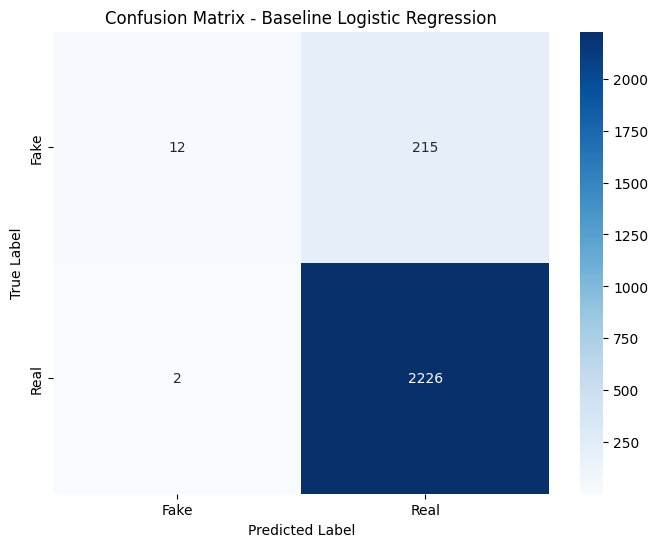

In [10]:
# Step 4: Baseline Model Training
print("Step 4: Baseline Model Training (Logistic Regression)")
print("-" * 40)

# Train Logistic Regression classifier
lr_model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
print("Training Logistic Regression model...")
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✓ Model training completed")
print(f"\nBaseline Model Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

# Detailed classification report
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Fake', 'Real'], 
           yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix - Baseline Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n" + "="*80)

Step 5: Handle Class Imbalance
----------------------------------------
Training Logistic Regression with balanced class weights...
✓ Balanced model training completed

Performance Comparison:
Metric       Baseline   Balanced   Improvement 
--------------------------------------------------
Accuracy     0.9116     0.8424     -0.0692
Precision    0.9119     0.9582     +0.0463
Recall       0.9991     0.8640     -0.1351
F1-score     0.9535     0.9087     -0.0449

Balanced Model Classification Report:
              precision    recall  f1-score   support

        Fake       0.32      0.63      0.42       227
        Real       0.96      0.86      0.91      2228

    accuracy                           0.84      2455
   macro avg       0.64      0.75      0.67      2455
weighted avg       0.90      0.84      0.86      2455


Balanced Model Confusion Matrix:
[[ 143   84]
 [ 303 1925]]


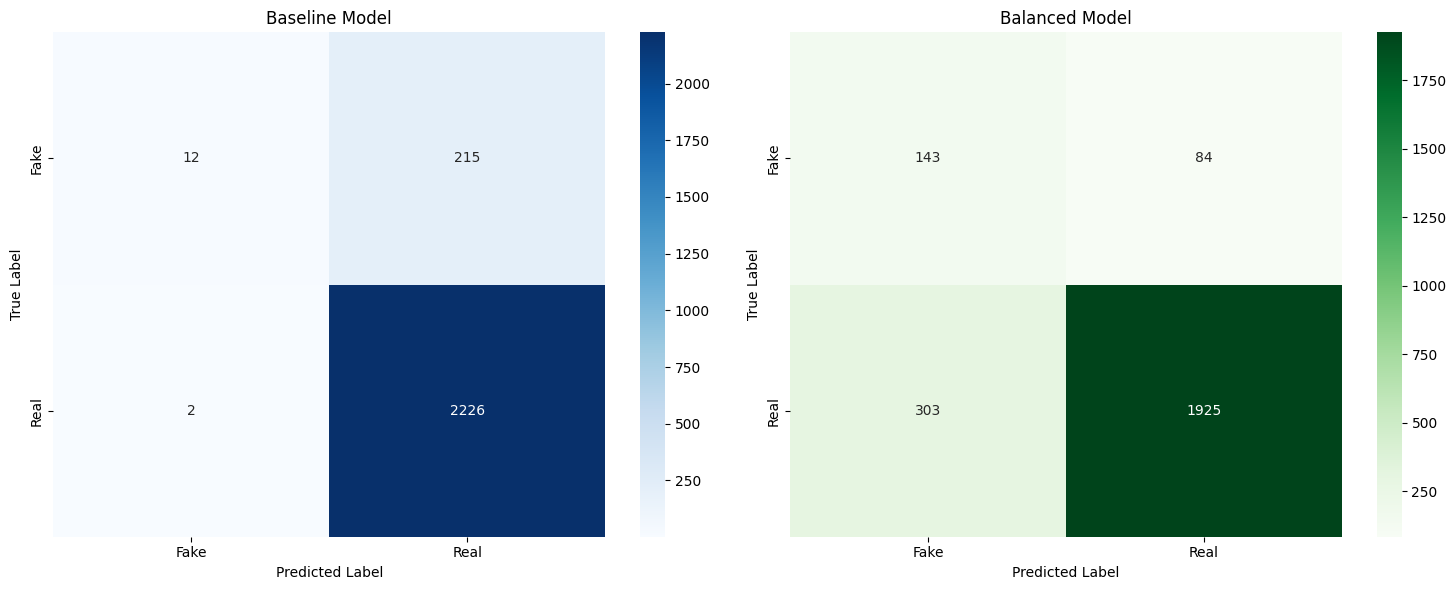

In [11]:
# Step 5: Handle Class Imbalance
print("Step 5: Handle Class Imbalance")
print("-" * 40)

# Train Logistic Regression with balanced class weights
lr_balanced = LogisticRegression(
    random_state=RANDOM_STATE, 
    max_iter=1000,
    class_weight='balanced'  # Automatically adjust weights inversely proportional to class frequencies
)

print("Training Logistic Regression with balanced class weights...")
lr_balanced.fit(X_train, y_train)

# Make predictions
y_pred_balanced = lr_balanced.predict(X_test)
y_pred_proba_balanced = lr_balanced.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
precision_balanced = precision_score(y_test, y_pred_balanced)
recall_balanced = recall_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced)

print(f"✓ Balanced model training completed")

# Compare performance
print(f"\nPerformance Comparison:")
print(f"{'Metric':<12} {'Baseline':<10} {'Balanced':<10} {'Improvement':<12}")
print("-" * 50)
print(f"{'Accuracy':<12} {accuracy:<10.4f} {accuracy_balanced:<10.4f} {accuracy_balanced-accuracy:+.4f}")
print(f"{'Precision':<12} {precision:<10.4f} {precision_balanced:<10.4f} {precision_balanced-precision:+.4f}")
print(f"{'Recall':<12} {recall:<10.4f} {recall_balanced:<10.4f} {recall_balanced-recall:+.4f}")
print(f"{'F1-score':<12} {f1:<10.4f} {f1_balanced:<10.4f} {f1_balanced-f1:+.4f}")

# Detailed classification report for balanced model
print(f"\nBalanced Model Classification Report:")
print(classification_report(y_test, y_pred_balanced, target_names=['Fake', 'Real']))

# Confusion Matrix for balanced model
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
print(f"\nBalanced Model Confusion Matrix:")
print(cm_balanced)

# Plot confusion matrices side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
           xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
ax1.set_title('Baseline Model')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Greens', ax=ax2,
           xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
ax2.set_title('Balanced Model')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

plt.tight_layout()
plt.show()

print("\n" + "="*80)

In [12]:
# Step 6: Try Advanced Models
print("Step 6: Advanced Models Comparison")
print("-" * 40)

# Dictionary to store models and their performance
models = {}
model_results = {}

# 1. Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=RANDOM_STATE,
    class_weight='balanced',
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

models['Random Forest'] = rf_model
model_results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, rf_pred),
    'precision': precision_score(y_test, rf_pred),
    'recall': recall_score(y_test, rf_pred),
    'f1': f1_score(y_test, rf_pred)
}

# Add previous models to comparison
models['Logistic Regression'] = lr_model
model_results['Logistic Regression'] = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1
}

models['Logistic Regression (Balanced)'] = lr_balanced
model_results['Logistic Regression (Balanced)'] = {
    'accuracy': accuracy_balanced,
    'precision': precision_balanced,
    'recall': recall_balanced,
    'f1': f1_balanced
}

print("✓ Random Forest training completed")

# Try XGBoost if available
try:
    from xgboost import XGBClassifier
    print("Training XGBoost...")
    
    # Calculate scale_pos_weight for XGBoost class balancing
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
    
    xgb_model = XGBClassifier(
        random_state=RANDOM_STATE,
        scale_pos_weight=scale_pos_weight,
        eval_metric='logloss'
    )
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    
    models['XGBoost'] = xgb_model
    model_results['XGBoost'] = {
        'accuracy': accuracy_score(y_test, xgb_pred),
        'precision': precision_score(y_test, xgb_pred),
        'recall': recall_score(y_test, xgb_pred),
        'f1': f1_score(y_test, xgb_pred)
    }
    print("✓ XGBoost training completed")
    
except ImportError:
    print("XGBoost not available. Install with: pip install xgboost")

# Compare all models
print(f"\nModel Performance Comparison:")
print("="*80)
print(f"{'Model':<30} {'Accuracy':<10} {'Precision':<12} {'Recall':<10} {'F1-Score':<10}")
print("-"*80)

best_f1 = 0
best_model_name = ""

for model_name, metrics in model_results.items():
    print(f"{model_name:<30} {metrics['accuracy']:<10.4f} {metrics['precision']:<12.4f} "
          f"{metrics['recall']:<10.4f} {metrics['f1']:<10.4f}")
    
    if metrics['f1'] > best_f1:
        best_f1 = metrics['f1']
        best_model_name = model_name

print(f"\n🏆 Best performing model: {best_model_name} (F1-Score: {best_f1:.4f})")
best_model = models[best_model_name]

# Feature importance for tree-based models
if best_model_name in ['Random Forest', 'XGBoost']:
    print(f"\nTop 20 Most Important Features ({best_model_name}):")
    feature_importance = best_model.feature_importances_
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    # Get top features
    top_indices = np.argsort(feature_importance)[::-1][:20]
    for i, idx in enumerate(top_indices):
        print(f"{i+1:2d}. {feature_names[idx]:<20} {feature_importance[idx]:.4f}")

print("\n" + "="*80)

Step 6: Advanced Models Comparison
----------------------------------------
Training Random Forest...
✓ Random Forest training completed
✓ Random Forest training completed
Training XGBoost...
Training XGBoost...
✓ XGBoost training completed

Model Performance Comparison:
Model                          Accuracy   Precision    Recall     F1-Score  
--------------------------------------------------------------------------------
Random Forest                  0.9242     0.9244       0.9982     0.9599    
Logistic Regression            0.9116     0.9119       0.9991     0.9535    
Logistic Regression (Balanced) 0.8424     0.9582       0.8640     0.9087    
XGBoost                        0.9018     0.9564       0.9345     0.9453    

🏆 Best performing model: Random Forest (F1-Score: 0.9599)

Top 20 Most Important Features (Random Forest):
 1. link                 0.0045
 2. min                  0.0042
 3. hillary              0.0042
 4. infowars             0.0041
 5. source               0

Step 7: Model Explainability
----------------------------------------
Feature importance analysis for Random Forest:

Top 20 Most Important Features:
 1. link                 0.0045
 2. min                  0.0042
 3. hillary              0.0042
 4. infowars             0.0041
 5. source               0.0040
 6. world                0.0037
 7. article              0.0036
 8. wire                 0.0035
 9. posted               0.0035
10. tag                  0.0034
11. post                 0.0033
12. state                0.0033
13. duke                 0.0031
14. republican           0.0031
15. woman                0.0031
16. share                0.0030
17. jones                0.0030
18. published            0.0030
19. что                  0.0028
20. trump                0.0028


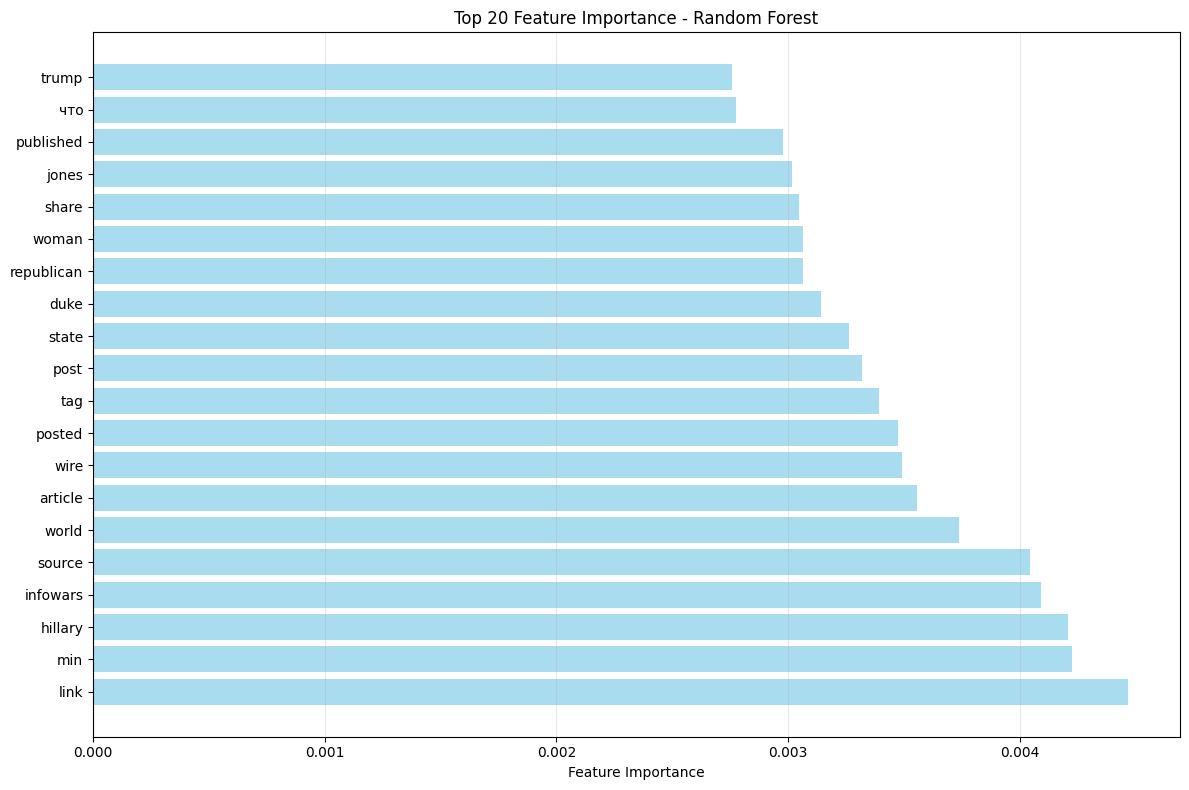

SHAP not available. Install with: pip install shap



In [13]:
# Step 7: Model Explainability
print("Step 7: Model Explainability")
print("-" * 40)

# For Logistic Regression, we can analyze coefficients
if 'Logistic' in best_model_name:
    print(f"Analyzing {best_model_name} coefficients...")
    
    # Get feature names and coefficients
    feature_names = tfidf_vectorizer.get_feature_names_out()
    coefficients = best_model.coef_[0]
    
    # Get top positive coefficients (indicating "Real" news)
    top_positive_indices = np.argsort(coefficients)[::-1][:15]
    print(f"\nTop 15 words indicating REAL news:")
    for i, idx in enumerate(top_positive_indices):
        print(f"{i+1:2d}. {feature_names[idx]:<20} {coefficients[idx]:.4f}")
    
    # Get top negative coefficients (indicating "Fake" news)
    top_negative_indices = np.argsort(coefficients)[:15]
    print(f"\nTop 15 words indicating FAKE news:")
    for i, idx in enumerate(top_negative_indices):
        print(f"{i+1:2d}. {feature_names[idx]:<20} {coefficients[idx]:.4f}")
    
    # Visualize top coefficients
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Top positive coefficients
    top_pos_words = [feature_names[idx] for idx in top_positive_indices]
    top_pos_coefs = [coefficients[idx] for idx in top_positive_indices]
    
    ax1.barh(range(len(top_pos_words)), top_pos_coefs, color='green', alpha=0.7)
    ax1.set_yticks(range(len(top_pos_words)))
    ax1.set_yticklabels(top_pos_words)
    ax1.set_xlabel('Coefficient Value')
    ax1.set_title('Top Words Indicating REAL News')
    ax1.grid(axis='x', alpha=0.3)
    
    # Top negative coefficients
    top_neg_words = [feature_names[idx] for idx in top_negative_indices]
    top_neg_coefs = [coefficients[idx] for idx in top_negative_indices]
    
    ax2.barh(range(len(top_neg_words)), top_neg_coefs, color='red', alpha=0.7)
    ax2.set_yticks(range(len(top_neg_words)))
    ax2.set_yticklabels(top_neg_words)
    ax2.set_xlabel('Coefficient Value')
    ax2.set_title('Top Words Indicating FAKE News')
    ax2.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

else:
    print(f"Feature importance analysis for {best_model_name}:")
    
    # For tree-based models, show feature importance
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = best_model.feature_importances_
        feature_names = tfidf_vectorizer.get_feature_names_out()
        
        # Get top and bottom features
        top_indices = np.argsort(feature_importance)[::-1][:20]
        
        print(f"\nTop 20 Most Important Features:")
        for i, idx in enumerate(top_indices):
            print(f"{i+1:2d}. {feature_names[idx]:<20} {feature_importance[idx]:.4f}")
        
        # Visualize feature importance
        plt.figure(figsize=(12, 8))
        top_words = [feature_names[idx] for idx in top_indices]
        top_importance = [feature_importance[idx] for idx in top_indices]
        
        plt.barh(range(len(top_words)), top_importance, color='skyblue', alpha=0.7)
        plt.yticks(range(len(top_words)), top_words)
        plt.xlabel('Feature Importance')
        plt.title(f'Top 20 Feature Importance - {best_model_name}')
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

# Try SHAP if available (optional)
try:
    import shap
    print(f"\nSHAP Analysis available. Generating sample explanations...")
    
    # For demonstration, explain a few predictions
    if 'Logistic' in best_model_name:
        explainer = shap.LinearExplainer(best_model, X_train[:100])  # Use sample for speed
        shap_values = explainer.shap_values(X_test[:5])
        
        print("✓ SHAP analysis completed for sample predictions")
        print("Note: Full SHAP analysis can be computationally expensive for large datasets")
    
except ImportError:
    print("SHAP not available. Install with: pip install shap")

print("\n" + "="*80)

In [16]:
# Step 8: Export Model and Create Prediction Function
print("Step 8: Export Model and Create Prediction Function")
print("-" * 40)

import os
import pickle

# Create models directory if it doesn't exist
models_dir = '../models'
os.makedirs(models_dir, exist_ok=True)

# Save the best model and vectorizer
model_path = f'{models_dir}/best_fake_news_model.joblib'
vectorizer_path = f'{models_dir}/tfidf_vectorizer.joblib'

print(f"Saving best model ({best_model_name}) and TF-IDF vectorizer...")
joblib.dump(best_model, model_path)
joblib.dump(tfidf_vectorizer, vectorizer_path)

print(f"✓ Model saved to: {model_path}")
print(f"✓ Vectorizer saved to: {vectorizer_path}")

# Save model metadata
metadata = {
    'model_name': best_model_name,
    'model_type': type(best_model).__name__,
    'performance': model_results[best_model_name],
    'vocabulary_size': len(tfidf_vectorizer.vocabulary_),
    'training_samples': X_train.shape[0],  # Fix: use shape[0] for sparse matrices
    'test_samples': X_test.shape[0],       # Fix: use shape[0] for sparse matrices
    'feature_extraction': 'TF-IDF',
    'preprocessing_steps': [
        'Lowercase conversion',
        'Punctuation removal',
        'Number removal', 
        'Stopword removal',
        'Lemmatization'
    ]
}

metadata_path = f'{models_dir}/model_metadata.pickle'
with open(metadata_path, 'wb') as f:
    pickle.dump(metadata, f)
print(f"✓ Metadata saved to: {metadata_path}")

# Create prediction function
def predict_fake_news(text, model_path=model_path, vectorizer_path=vectorizer_path):
    """
    Predict if a news article is fake or real.
    
    Args:
        text (str): The news article text to classify
        model_path (str): Path to the saved model
        vectorizer_path (str): Path to the saved TF-IDF vectorizer
    
    Returns:
        dict: Prediction results containing label, probability, and confidence
    """
    # Load model and vectorizer
    model = joblib.load(model_path)
    vectorizer = joblib.load(vectorizer_path)
    
    # Preprocess the text (same as training preprocessing)
    import re
    import string
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer
    
    # Initialize preprocessing tools
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    # Preprocess text
    processed_text = text.lower()
    processed_text = re.sub(r'http\S+|www\S+|https\S+', '', processed_text, flags=re.MULTILINE)
    processed_text = re.sub(r'@\w+|#\w+', '', processed_text)
    processed_text = re.sub(r'\d+', '', processed_text)
    processed_text = processed_text.translate(str.maketrans('', '', string.punctuation))
    processed_text = re.sub(r'\s+', ' ', processed_text).strip()
    
    tokens = word_tokenize(processed_text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens 
              if word not in stop_words and len(word) > 2]
    processed_text = ' '.join(tokens)
    
    # Transform text using TF-IDF
    text_features = vectorizer.transform([processed_text])
    
    # Make prediction
    prediction = model.predict(text_features)[0]
    prediction_proba = model.predict_proba(text_features)[0]
    
    # Prepare results
    label = 'FAKE' if prediction == 0 else 'REAL'
    fake_prob = prediction_proba[0]
    real_prob = prediction_proba[1]
    confidence = max(fake_prob, real_prob)
    
    return {
        'label': label,
        'prediction': int(prediction),
        'fake_probability': fake_prob,
        'real_probability': real_prob,
        'confidence': confidence,
        'processed_text': processed_text[:200] + '...' if len(processed_text) > 200 else processed_text
    }

# Test the prediction function with sample texts
print(f"\nTesting prediction function with sample texts:")
print("-" * 60)

# Test samples
test_samples = [
    "Breaking: Scientists discover new cure for cancer using advanced AI technology.",
    "SHOCKING: Aliens landed in Area 51 and government is hiding the truth!!!",
    "The stock market closed higher today as investors remained optimistic about economic recovery.",
    "You won't believe what this celebrity did! Doctors hate this one simple trick!"
]

for i, sample_text in enumerate(test_samples, 1):
    result = predict_fake_news(sample_text)
    print(f"\nSample {i}:")
    print(f"Text: {sample_text}")
    print(f"Prediction: {result['label']} (Confidence: {result['confidence']:.3f})")
    print(f"Probabilities - Fake: {result['fake_probability']:.3f}, Real: {result['real_probability']:.3f}")

print(f"\n✓ Prediction function created and tested successfully!")
print(f"\nTo use the model in production:")
print(f"1. Load the model: model = joblib.load('{model_path}')")
print(f"2. Load the vectorizer: vectorizer = joblib.load('{vectorizer_path}')")
print(f"3. Use predict_fake_news(text) function for predictions")

print("\n" + "="*80)
print("FAKE NEWS DETECTION PIPELINE COMPLETED SUCCESSFULLY!")
print("="*80)
print(f"\nFinal Model Summary:")
print(f"- Best Model: {best_model_name}")
print(f"- F1-Score: {model_results[best_model_name]['f1']:.4f}")
print(f"- Accuracy: {model_results[best_model_name]['accuracy']:.4f}")
print(f"- Training Samples: {X_train.shape[0]:,}")
print(f"- Test Samples: {X_test.shape[0]:,}")
print(f"- Vocabulary Size: {len(tfidf_vectorizer.vocabulary_):,}")
print(f"\nModel files saved in: {models_dir}/")

Step 8: Export Model and Create Prediction Function
----------------------------------------
Saving best model (Random Forest) and TF-IDF vectorizer...
✓ Model saved to: ../models/best_fake_news_model.joblib
✓ Vectorizer saved to: ../models/tfidf_vectorizer.joblib
✓ Metadata saved to: ../models/model_metadata.pickle

Testing prediction function with sample texts:
------------------------------------------------------------

Sample 1:
Text: Breaking: Scientists discover new cure for cancer using advanced AI technology.
Prediction: REAL (Confidence: 0.910)
Probabilities - Fake: 0.090, Real: 0.910

Sample 2:
Text: SHOCKING: Aliens landed in Area 51 and government is hiding the truth!!!
Prediction: REAL (Confidence: 0.970)
Probabilities - Fake: 0.030, Real: 0.970

Sample 3:
Text: The stock market closed higher today as investors remained optimistic about economic recovery.
Prediction: REAL (Confidence: 0.930)
Probabilities - Fake: 0.070, Real: 0.930

Sample 1:
Text: Breaking: Scientists di